# Kinematic Maps
This code reads in the numpy array (created in https://github.com/bfmcdonald/Kinematics_of_MW_Bulge_Astrophysics_Research_2024_Internship/blob/main/create_numpy_file_from_sim.ipynb ) as a pandas dataframe.<br>
The stars in the bulge are seperated into their old and young populations.<br>
A parameter of the stars is binned in 2D by its x and y coordinates (this code shows the kinemtaic map stars in galactic cylindrical coordinates v_R, v_ϕ, σ_R, σ_ϕ by binning in galacto-centric rectangular coordinates x, y)

## Libraries

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as stats

## Load in numpy array as panda dataframe

In [19]:


def load_simulation(filename):

    df = pd.DataFrame(np.load(filename + ".npy"))
    columns = np.load(filename + "_columns.npy")

    if len(columns) == df.shape[1]:
        df.columns = columns
    else:
        raise ValueError("The number of columns to set did not have the right size!")
    
    print(filename,"loaded successfully.")

    return df


data = load_simulation('', '708main_MWout_bar27_scale1.7_8.1R0_test')


708main_MWout_bar27_scale1.7_8.1R0_test loaded successfully.


## Select the bulge

In [20]:
bulge = data[(abs(data.b < 15)) & (abs(data.l) < 15) & (5 < data.d) & (data.d < 11) & (0.5 < abs(data.z)) & (abs(data.z) < 3)]

# old and young population
young = bulge[(bulge.age < 7) & (bulge.age > 4)]
old = bulge[(bulge.age < 10) & (bulge.age > 9.5)]

## Kinematic map

In [53]:
def kin_map_vel(x, y, v_param, stat, bins=100, row=0, col=0, label=''):

    # binning
    res, x_bin, y_bin, bin_n = stats.binned_statistic_2d(x, y, v_param, bins=bins, statistic=stat)

    res = res.T

    # centre of x bins
    bin_diff_x = x_bin[2] - x_bin[1]
    bin_cen_x = x_bin[1:]-(bin_diff_x/2)

    # centre of y bins
    bin_diff_y = y_bin[2] - y_bin[1]
    bin_cen_y = y_bin[1:]-(bin_diff_y/2)

    ax[row, col].set_xlim(-1.5, 1.5)
    ax[row, col].set_ylim(-1.5, 1.5)
    ax[row, col].tick_params(which='both', direction='in', top=True, right=True)

    # contour map
    map = ax[row, col].contourf(bin_cen_x, bin_cen_y, res, cmap='bwr')

    plt.colorbar(map, ax=ax[row, col], label=label, extend='both')



## Plotting

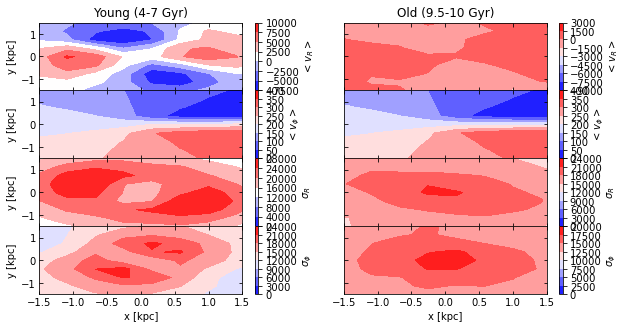

In [54]:

fig, ax = plt.subplots(4, 2, figsize=(10,5))

kin_map_vel(young.x, young.y, young.vR, stat='mean', bins=15, col=0, row=0, label=r'$<v_R>$')
kin_map_vel(old.x, old.y, old.vR, stat='mean', bins=15, col=1, row=0, label=r'$<v_R>$')

kin_map_vel(young.x, young.y, young.phi, stat='mean', bins=15, col=0, row=1, label=r'$<v_ϕ>$')
kin_map_vel(old.x, old.y, old.phi, stat='mean', bins=15, col=1, row=1, label=r'$<v_ϕ>$')

kin_map_vel(young.x, young.y, young.vR, stat='std', bins=15, col=0, row=2, label=r'$σ_R$')
kin_map_vel(old.x, old.y, old.vR, stat='std', bins=15, col=1, row=2, label=r'$σ_R$')

kin_map_vel(young.x, young.y, young.vphi, stat='std', bins=15, col=0, row=3, label=r'$σ_ϕ$')
kin_map_vel(old.x, old.y, old.vphi, stat='std', bins=15, col=1, row=3, label=r'$σ_ϕ$')

ax[0, 0].set_title('Young (4-7 Gyr)')
ax[0, 1].set_title('Old (9.5-10 Gyr)')
ax[0, 0].set_ylabel('y [kpc]')

ax[0, 1].set_yticklabels([])
ax[0, 1].set_xticklabels([])
ax[0, 0].set_xticklabels([])

ax[1, 0].set_ylabel('y [kpc]')
ax[1, 1].set_yticklabels([])
ax[1, 1].set_xticklabels([])
ax[1, 0].set_xticklabels([])

ax[2, 0].set_ylabel('y [kpc]')
ax[2, 1].set_yticklabels([])
ax[2, 1].set_xticklabels([])
ax[2, 0].set_xticklabels([])

ax[3, 0].set_ylabel('y [kpc]')
ax[3, 1].set_yticklabels([])
ax[3, 0].set_xlabel('x [kpc]')
ax[3, 1].set_xlabel('x [kpc]')

plt.subplots_adjust(hspace=0)
plt.show()
